<b> Description</b>


  The Adult dataset
The information is a replica of the notes for the abalone dataset from the UCI repository.

<b>1. Title of Database: adult</b>

<b>2. Sources:</b>
(a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.
(b) Donor of database (name/phone/snail address/email address)
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com
(c) Date received (databases may change over time without name change!)
05/19/96


<b>3. Number of Instances</b>
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

<b>4. Number of Attributes</b>
6 continuous, 8 nominal attributes.

<b>5. Attribute Information:</b>
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

<b>6. Missing Attribute Values:</b>
7% have missing values.

<b>7. Class Distribution:</b>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)


    
    

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [157]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [158]:
df.shape

(48842, 15)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [160]:
missing_val=['?']#1doubt what if we add 'n/a','-' what will be the effect!
df=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/adult.csv',na_values=missing_val)
df.info()#doubt what is diff. b/w df.info and df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [161]:
#df.dropna(axis=1,how='all',inplace=True)#removing fnlwgt column

#df.drop(['fnlwgt'],axis=0,inplace=True)#removing fnlwgt column

#df.dropna(subset=['fnlwgt'])

#df.drop(["fnlwgt"],axis=1,inplace=True)
#df.drop(df.columns[[2]],axis=1,inplace=True)
#df.drop(['fnlwgt',axis=1])

df.drop('fnlwgt',axis=1,inplace=True)
print(df.info())


print('No. of rows',df.shape[0])
print('No. of columns',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None
No. of rows 48842
No. of columns 14


In [162]:
df[df.isnull().sum(axis=1)>=1]#showing all null values


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [184]:
df.dropna(axis=0,how='all',inplace=True)


print(df.info())

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None
(45222, 14)


In [181]:
#The percentage of rows that were removed while handling missing values

(len(df.index)/48842)*100

92.58834609557348

In [182]:
print(len(df.index))

45222


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

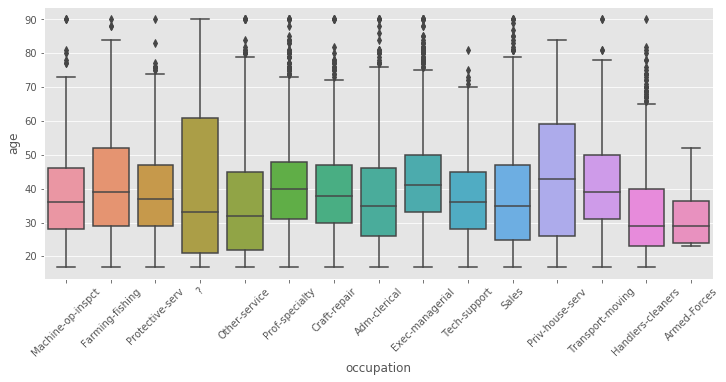

In [183]:
#for testing to check null values
plt.figure(figsize=(12,5))
sns.boxplot(data=adult,x='occupation',y='age')
plt.xticks(rotation=45)

<b>Univarite Analysis</b> step 4

1.Boxplot


{'whiskers': [<matplotlib.lines.Line2D at 0x27da70ffb48>,
 'caps': [<matplotlib.lines.Line2D at 0x27da70ffcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da70ff388>],
 'medians': [<matplotlib.lines.Line2D at 0x27da7103f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da7103cc8>],
 'means': []}

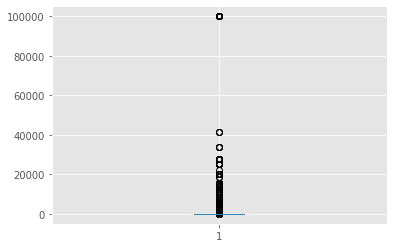

In [166]:
plt.boxplot(df['capital-gain'])


{'whiskers': [<matplotlib.lines.Line2D at 0x27da71605c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27da7160f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da715adc8>],
 'medians': [<matplotlib.lines.Line2D at 0x27da7167bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da710f848>],
 'means': []}

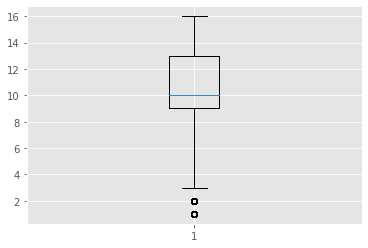

In [167]:
plt.boxplot(df['educational-num'])

<b>Observation</b>
25% educational-num comes b/w 9 to 10
50% educational-num is 10
75% educational-num comes b/w 12 to 13

outliers are from 0 to 2.

{'whiskers': [<matplotlib.lines.Line2D at 0x27df507bac8>,
 'caps': [<matplotlib.lines.Line2D at 0x27df5080b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27df507b1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x27df5085c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x27df5043488>],
 'means': []}

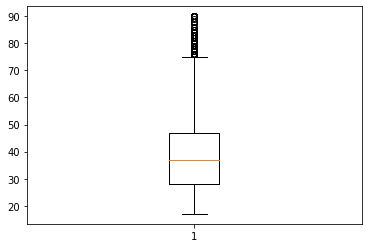

In [15]:
plt.boxplot(df['age'])

<b>Observation</b>
Most people's age is around 40.

There are some people who live after the age of 70.

{'whiskers': [<matplotlib.lines.Line2D at 0x27df50eea88>,
 'caps': [<matplotlib.lines.Line2D at 0x27df50f2b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x27df50ee908>],
 'medians': [<matplotlib.lines.Line2D at 0x27df50f6b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x27df50a1608>],
 'means': []}

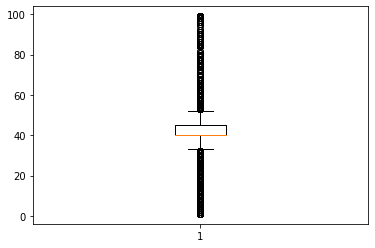

In [16]:
plt.boxplot(df['hours-per-week'])

<b>Observation</b>

Most people spend 40 hrs/week working
But there are some people who work more than 55 hrs/week
and there are some people who work less than 30 hrs/week

2.Histogram

(array([ 4228.,     0., 38903.,     0.,     0.,   353.,     0.,   435.,
            0.,  1303.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

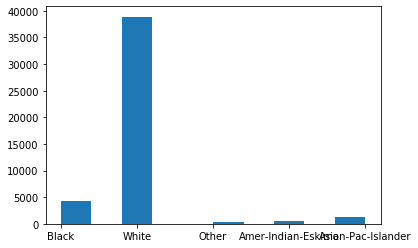

In [17]:
plt.hist(df['race'])

<b>Observation</b>

The population of white is very very high as compared to any other race.



(array([30527.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14695.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

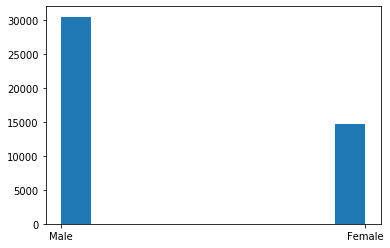

In [18]:
plt.hist(df['gender'])


<b>Observation</b>

The population of males are more than females.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

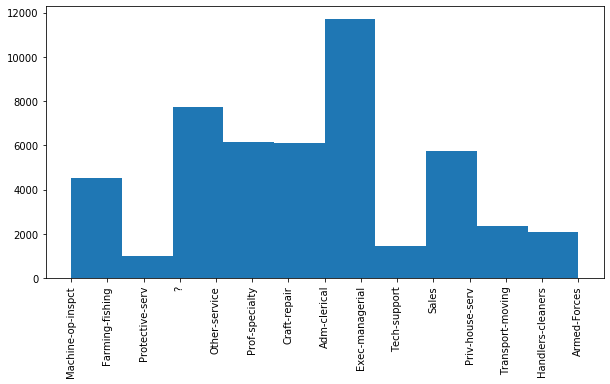

In [121]:
plt.figure(figsize=(10,5))
plt.hist(df['occupation'])#err
plt.xticks(rotation=90)

<b>Observation</b>

Most of the people are working as a exec-managerial.

People chooses less to be working as a protective serv.




([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

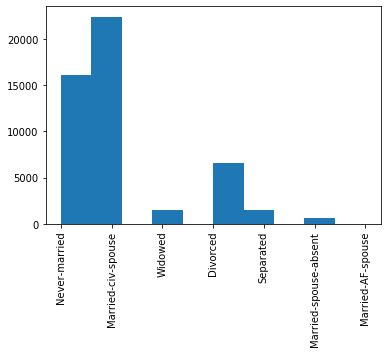

In [124]:
plt.hist(df['marital-status'])#err
c

<b>Observation</b>

The frequency of married civ spouse is high.

The frequency of married spouse absent is low

The frequency of never married people is also not bad.


(array([  294.,   449.,  1499.,  1223.,  2196., 14783., 11858.,  1507.,
        10084.,  1329.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

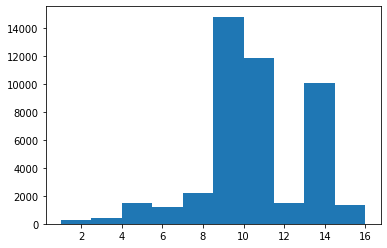

In [20]:
plt.hist(df['educational-num'])

<b>Observation</b>

The educational-num 10 is very high whereas the educational num 2 is very low.

(array([  777.,  2825.,  2933., 24910.,  4482.,  5621.,  2541.,   648.,
          287.,   198.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

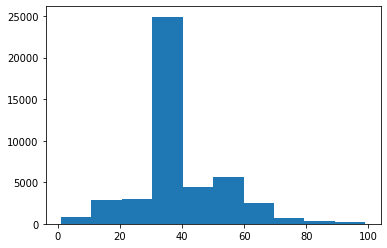

In [21]:
plt.hist(df['hours-per-week'])

<b>Observation</b>

The frequency of working for 40 hrs/week is high

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 <a list of 42 Text xticklabel objects>)

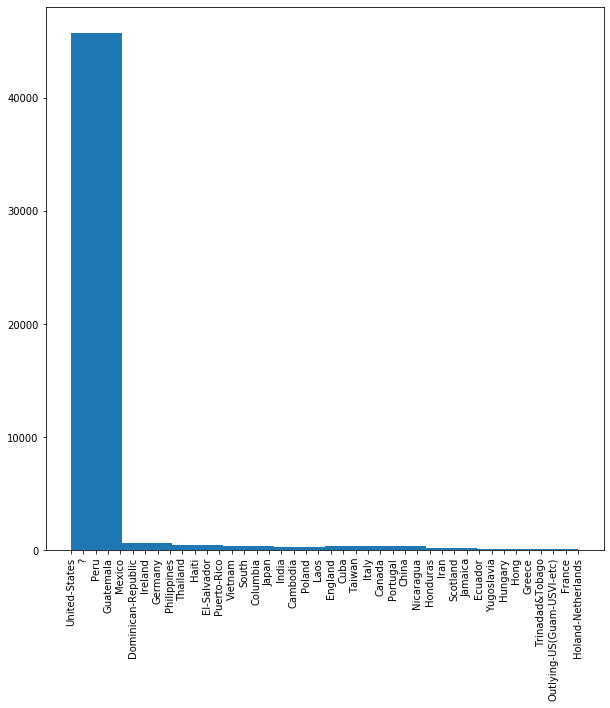

In [126]:
plt.figure(figsize=(10,10))
plt.hist(df['native-country'])#error
plt.xticks(rotation=90)

<b>Observation</b>

The frequency of U.S,peru , mexico is the highest.

(array([7308., 8226., 8704., 8811., 5716., 3609., 2000.,  579.,  192.,
          77.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

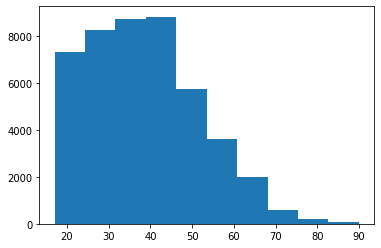

In [23]:
plt.hist(df['age'])

<b>Observation</b>

The frequency of age 40yrs is highest and the lowest is 90 yrs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

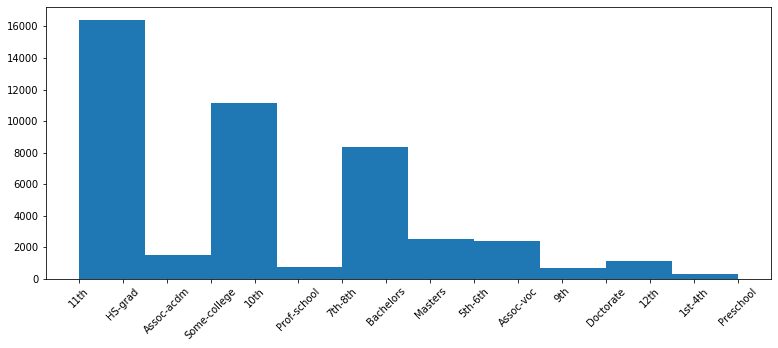

In [24]:
plt.figure(figsize=(13,5))
plt.hist(df.education)
plt.xticks(rotation=45)

<b>Observation</b>

The frequency of 11th std is highest and preschool is the lowest


3.Scatter Plot

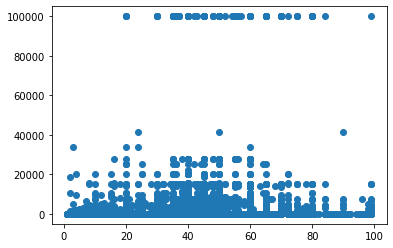

In [25]:
plt.scatter(df['hours-per-week'],df['capital-gain'])

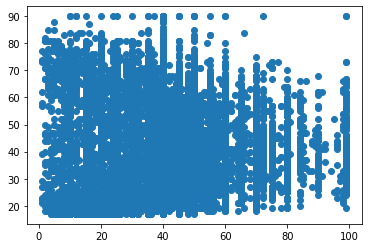

In [26]:
plt.scatter(df['hours-per-week'],df['age'])

<b>Observation</b>

There is no relationship between hours-per-week and age

<b>PDF</b>

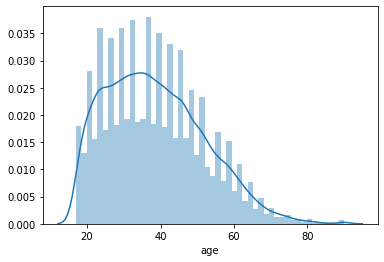

In [27]:
#plotting with seaborn!
sns.distplot(df['age'])#pdf

<b>Observation</b>

The probabilty that a peroson is of age 40 is 0.025
and the probabilty that a person is of age is around 80 is between 0.005

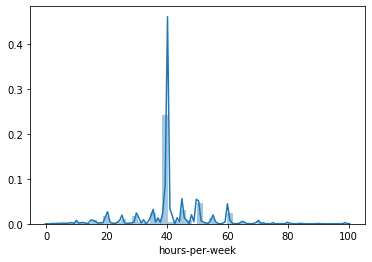

In [28]:
sns.distplot(df['hours-per-week'])#pdf

<b>Observation</b>
The probabilty that a person works around 40hrs/week is above 0.4.
and the probabilty that a person works more than 80 hrs/week is very less than 0.1

<b>Histogram</b>
    

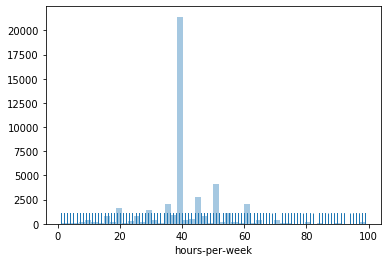

In [29]:
sns.distplot(df['hours-per-week'],kde=False,rug=True)

<b>Bivariate Analysis</b> (measure of relationship)

eg for numerical columns like scatter plots,hexbin plot,pair plots.

Joint Plot

1.Scatter Plot


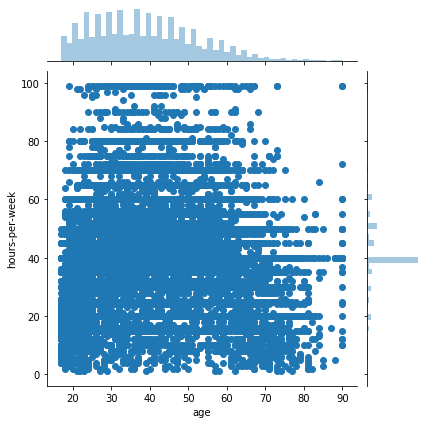

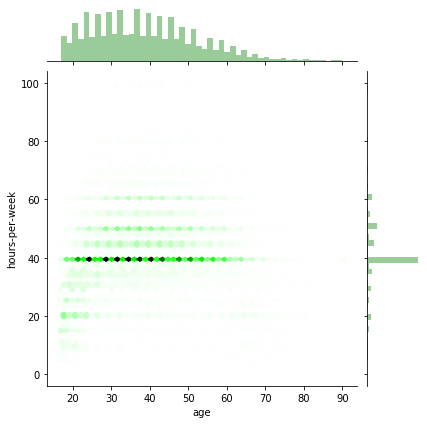

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

p1=sns.jointplot(x='age',y='hours-per-week',data=df,kind='scatter')

p2=sns.jointplot(x='age',y='hours-per-week',data=df,kind='hex',color='g')


<b>No Observation</b>

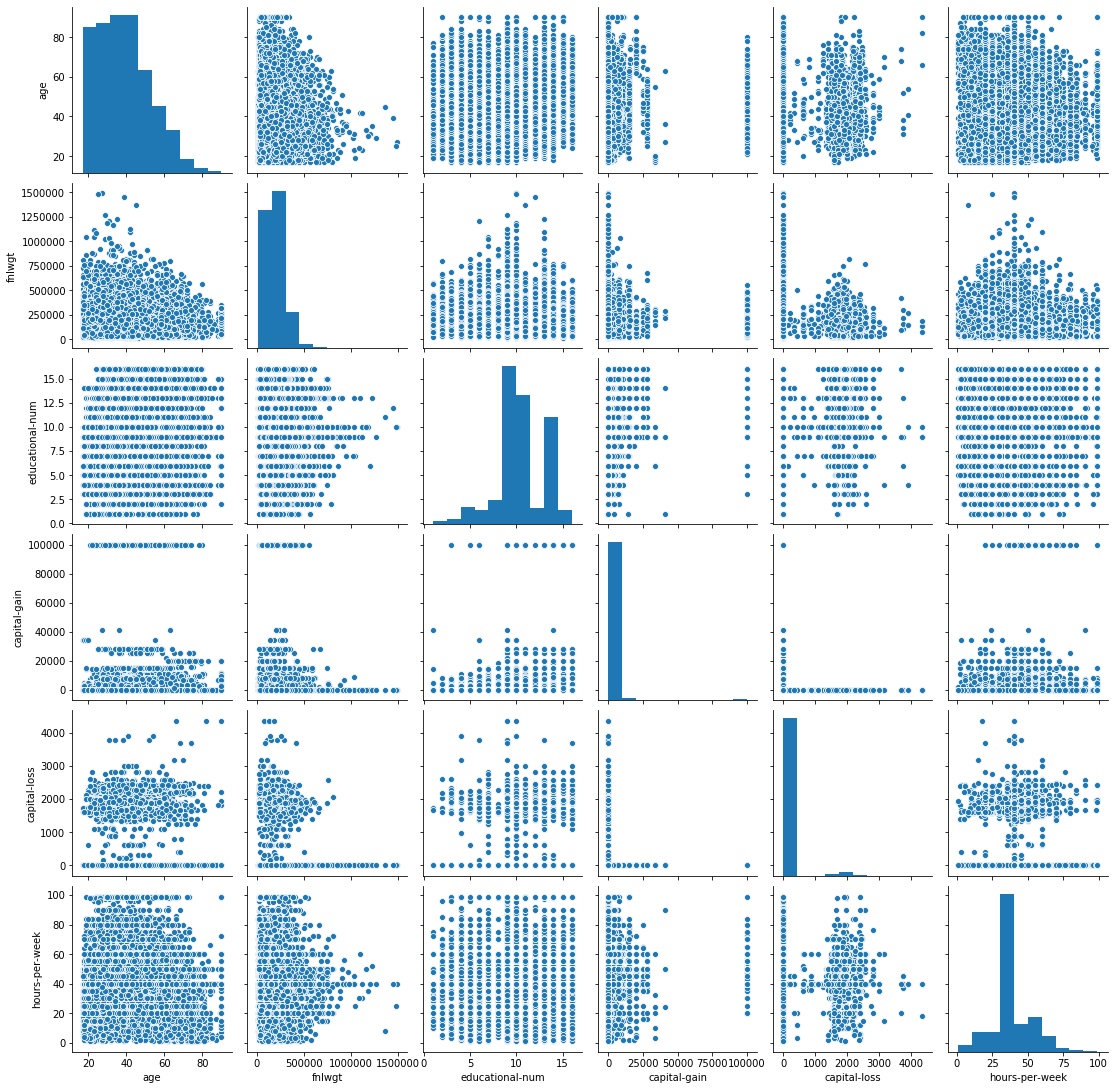

In [136]:
adult=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/adult.csv')
sns.pairplot(adult)

In [41]:
adult=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/adult.csv')
#sns.pairplot(adult,hue='hours-per-week')#big error coming dont run time waste hoga

In [42]:
adult['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

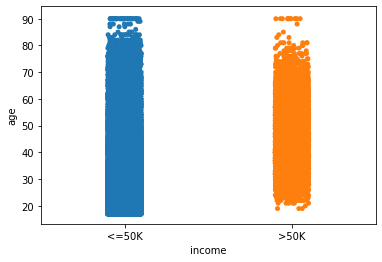

In [127]:
sns.stripplot(data=adult,x='income',y='age')

<b>Observation</b>

Its shocking to see that people at the age of 90 still works and have income of above 50k!

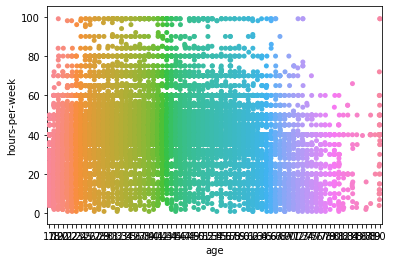

In [129]:
sns.stripplot(data=adult,x='age',y='hours-per-week')

<b>No Observation</b>

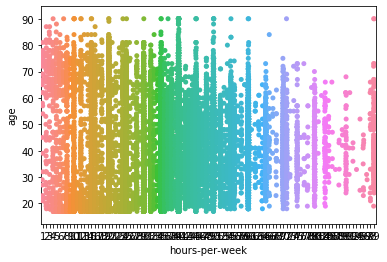

In [45]:
sns.stripplot(data=adult,x='hours-per-week',y='age')

<b>No Observation</b>

Swarm plot


KeyboardInterrupt: 

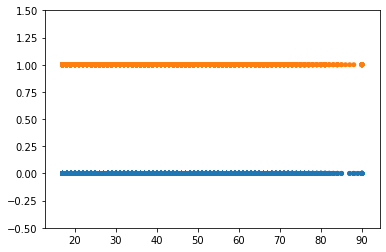

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/adult.csv')

sns.swarmplot(data=adult,x='age',y='gender')

<b>No Observation</b>

<b>boxplot</b>

In [ ]:


plt.figure(figsize=(15,8))
sns.boxplot(data=adult,x='age',y='hours-per-week')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

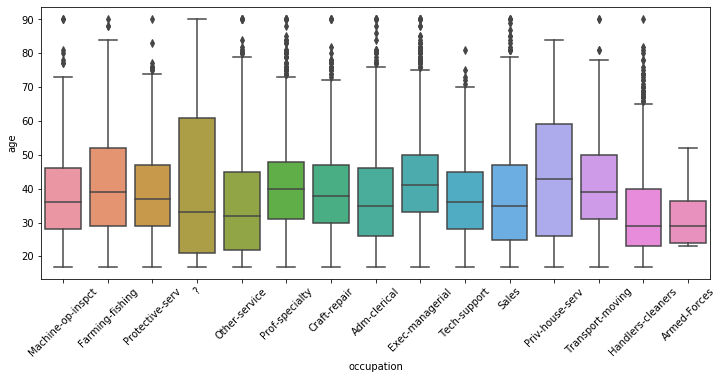

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(data=adult,x='occupation',y='age')
plt.xticks(rotation=45)

<b>Observation</b>

As we can see that there are no outliers in armed force that means after a particular age they get retired!
And most of the people in armed forces lie around 30.

Also in priv-house-serv there is no outliers that means there is age limit which is also quite big and most of the servants are of the age 40.

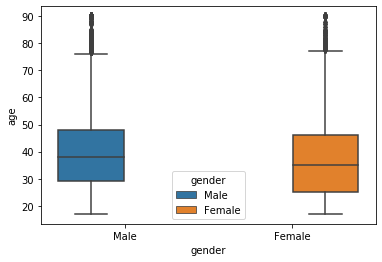

In [49]:
sns.boxplot(data=adult,x='gender',y='age',hue='gender')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

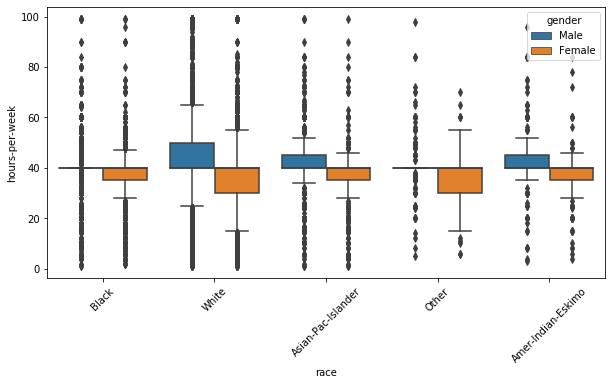

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(data=adult,x='race',y='hours-per-week',hue='gender')
plt.xticks(rotation=45)

<b>Observation</b>

As we can see that in every race male works more hours-per-week than females !
But white race works more than any other race!

In [ ]:
plt.figure(figsize=(14,5))#didnt run
sns.boxplot(data=adult,x='education',y='age')
plt.xticks(rotation=45)

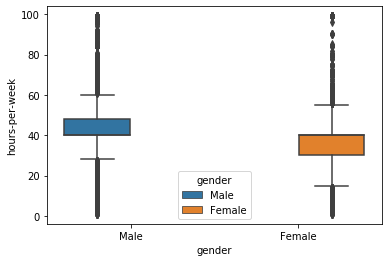

In [55]:
sns.boxplot(data=adult,x='gender',y='hours-per-week',hue='gender')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

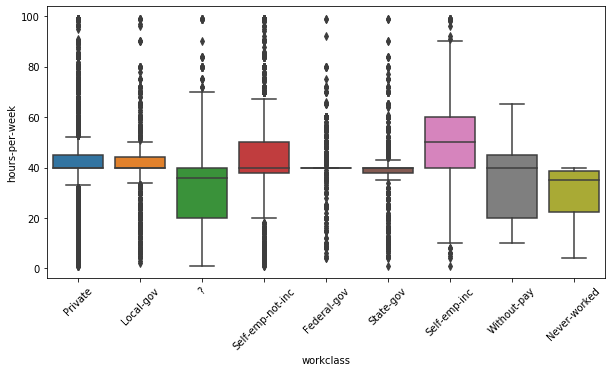

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(data=adult,x='workclass',y='hours-per-week')
plt.xticks(rotation=45)

<b>Observation</b>

In state gov. the range is from very low to very high , that means some people work very less and some people work very much that means some work only for their attendence in there office so as to get their salary. or we can they only passes their time.
whereas some people works more than 40-50 hrs/week that shows that their dedication and honesty towards work. 

<b>bar plot</b>


Shows the Average

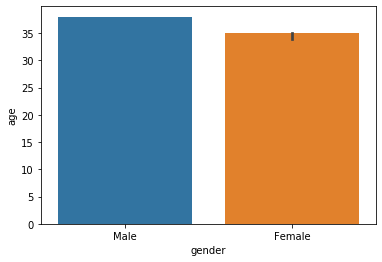

In [132]:
sns.barplot(x='gender',y='age',data=adult,estimator=np.median)

<b>Observation</b>

According to the data 'adult' we can see here that the average age of male and female i.e around <40 and <35 respectively. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

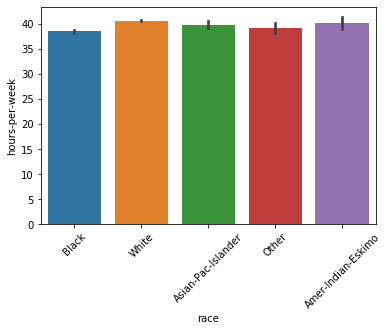

In [133]:
sns.barplot(x='race',y='hours-per-week',data=adult,)
plt.xticks(rotation=45)

<b>Observation</b>

On an average black works less hours per week as compared to other races.
And the remaining other races work on average of 40hr per week.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

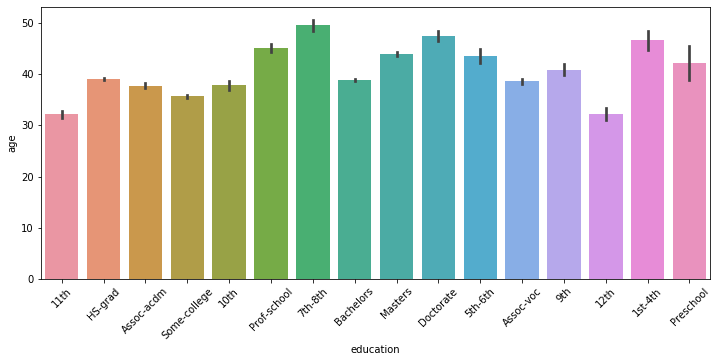

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x='education',y='age',data=adult)
plt.xticks(rotation=45)

<b>Observation</b>

The people educated till 7th-8th class have an average age of 50.
Also people who are doctorate have average age of 40 because it requires a lot years to complete that course.
The professors at school has also average age above 40 as it requires a lot research and experience to become a professor.


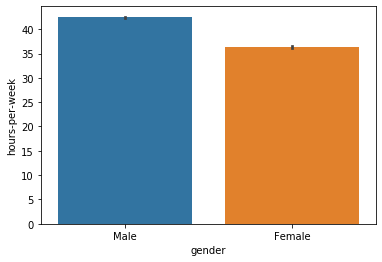

In [60]:
sns.barplot(x='gender',y='hours-per-week',data=adult)

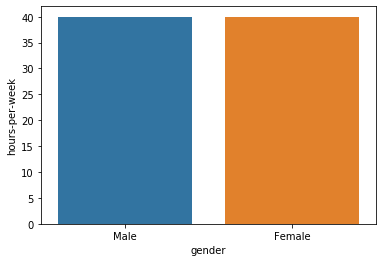

In [61]:
sns.barplot(x='gender',y='hours-per-week',data=adult,estimator=np.median)
#plt.xticks(rotation=45)

<b>Observation</b>

If we use median than both male and female work equally hrs/week
but without median male works more than female


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

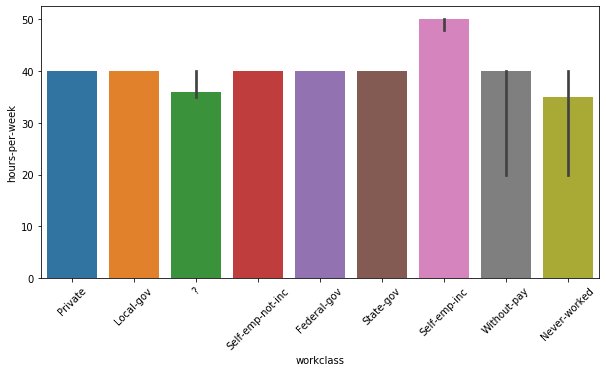

In [117]:

plt.figure(figsize=(10,5))
sns.barplot(x='workclass',y='hours-per-week',data=adult,estimator=np.median)
plt.xticks(rotation=45)


<b>Observation</b>

self empl. people works more hours per week than any other sector.
people in private and local gov. sectors works equally in term of hours per week.
people without-pay also woks for 30 to 40 hours per week , maybe in this category comes the mother or housewives.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

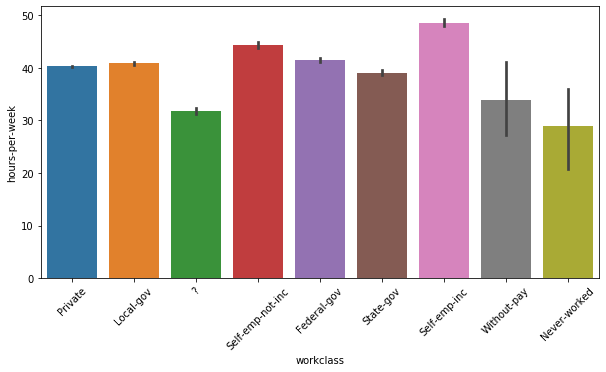

In [64]:
plt.figure(figsize=(10,5))

sns.barplot(x='workclass',y='hours-per-week',data=adult)
plt.xticks(rotation=45)


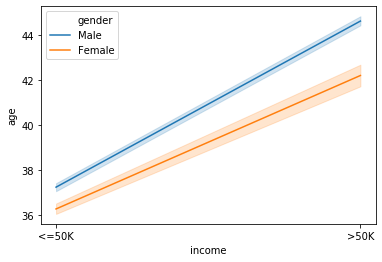

In [107]:
sns.lineplot(x='income',y='age',hue='gender',data=adult)

<b>Observation</b>

Income of male is always greater from female!

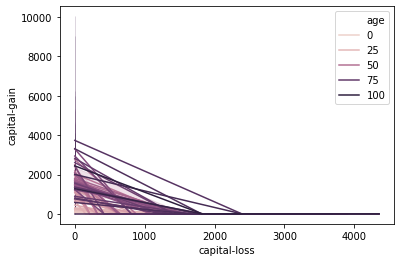

In [84]:
sns.lineplot(x='capital-loss',y='capital-gain',hue='age',data=adult)
plt.show()

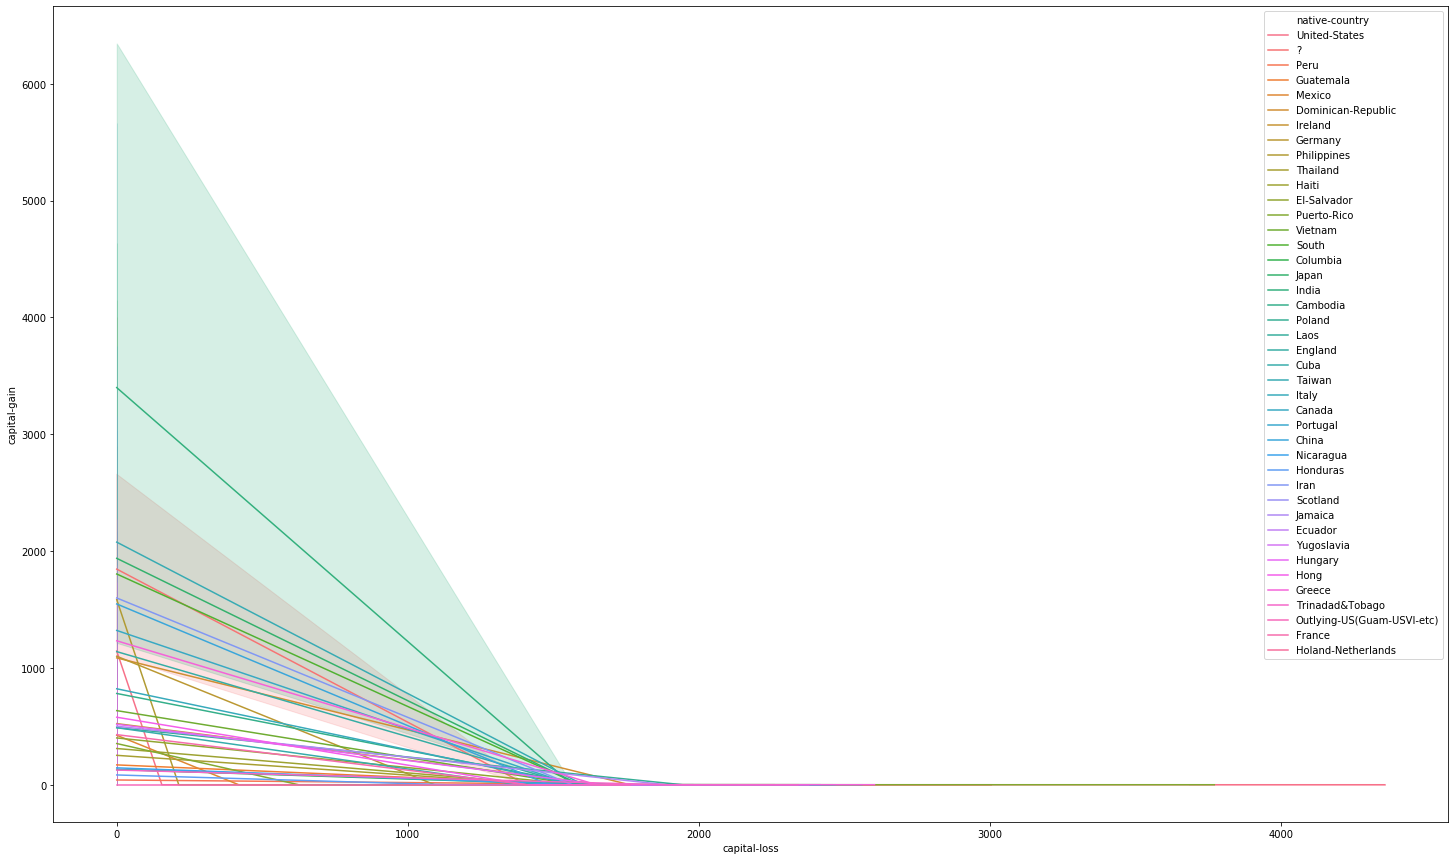

In [102]:
plt.figure(figsize=(25,15))
sns.lineplot(x='capital-loss',y='capital-gain',hue='native-country',data=adult)

<b>Observation</b>

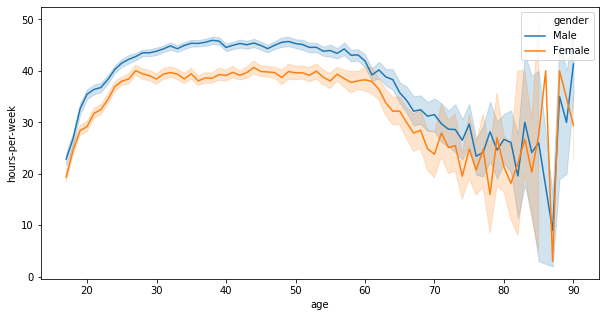

In [104]:
plt.figure(figsize=(10,5))
sns.lineplot(x='age',y='hours-per-week',hue='gender',data=adult)

<b>Observation</b>

Male works more hours per week than female for the maximum lifespan but in the age of 80-90 female works more .

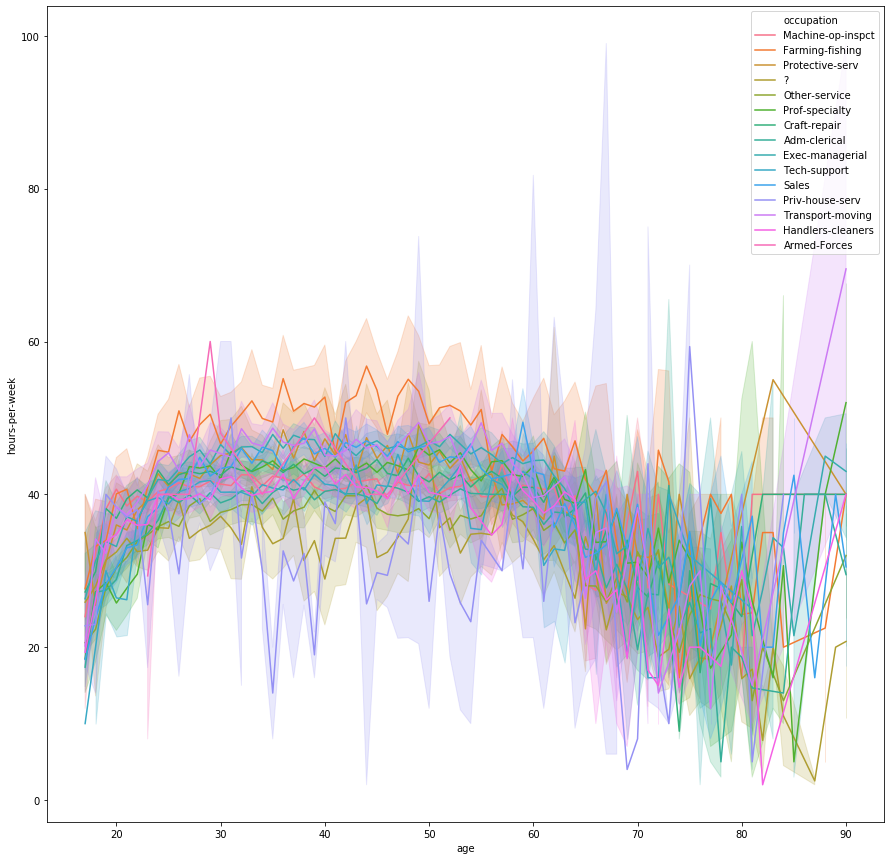

In [103]:
plt.figure(figsize=(15,15))
sns.lineplot(x='age',y='hours-per-week',hue='occupation',data=adult)

<b>Observation</b>

The private house servant less hours per week of all with respect to occupation.
Farming-fishing people work the most hours-per-week of estimate of 35 to 55 hrs/week.

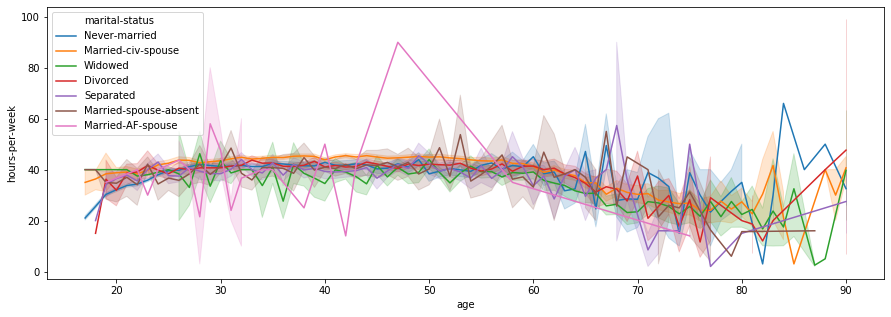

In [90]:
plt.figure(figsize=(15,5))
sns.lineplot(x='age',y='hours-per-week',hue='marital-status',data=adult)

<b>Observation</b>

1.The average widow works around 30 to 40 hours per week in her lifetime.

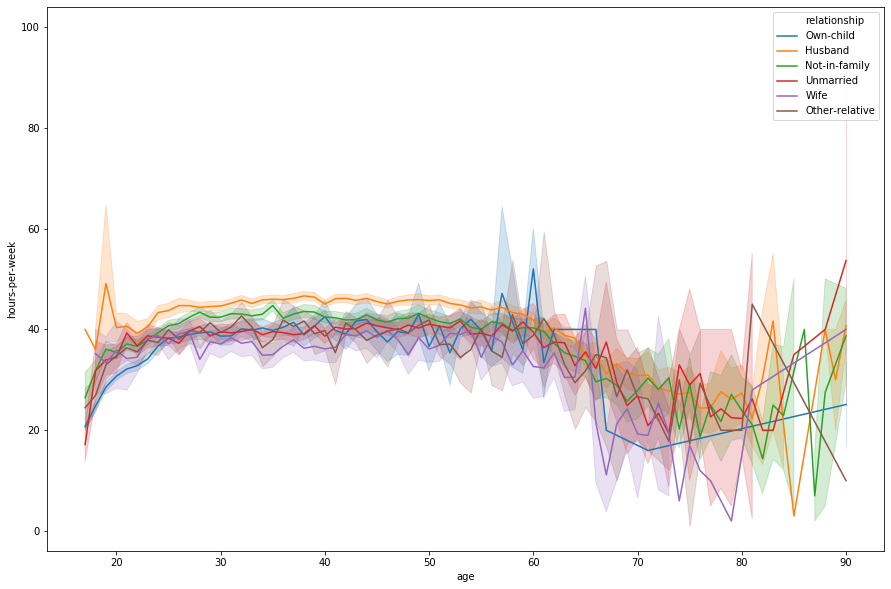

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(x='age',y='hours-per-week',hue='relationship',data=adult)

<b>Observation</b>

The people who are in relationship as a Husband works more hours per week as compared to the people who are in no relationship or unmarried , due to more family members.

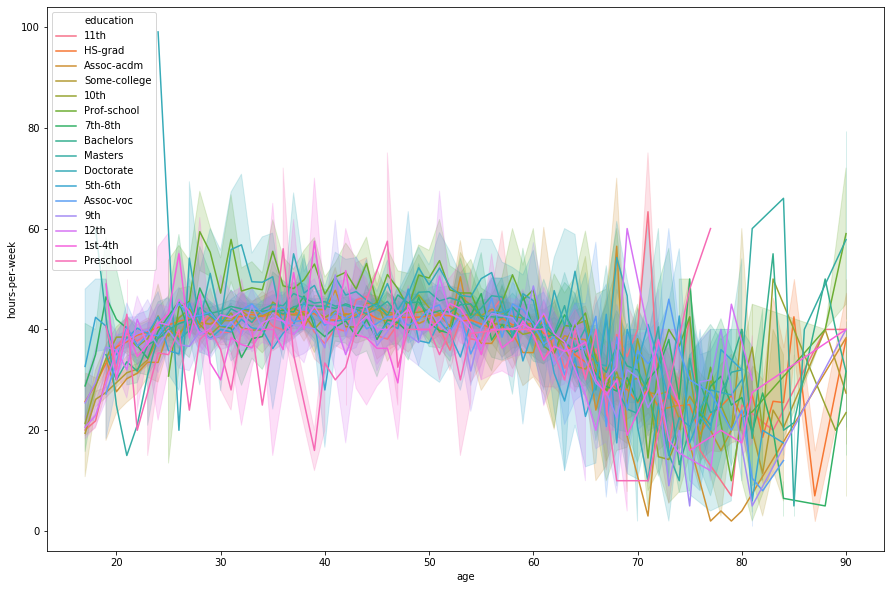

In [97]:
plt.figure(figsize=(15,10))
sns.lineplot(x='age',y='hours-per-week',hue='education',data=adult)

<b>Observation</b>



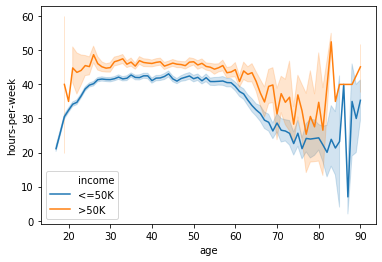

In [98]:
sns.lineplot(x='age',y='hours-per-week',hue='income',data=adult)

<b>Observation</b>

The people who's income is above 50k works more <i>hours per week</i> as compared to the people who's income is less than 50k.

In [155]:
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
#df['gender']
MinMaxScaler(df['gender'])

MinMaxScaler(copy=True,
             feature_range=0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 48842, dtype: object)

In [188]:
pd.get_dummies(df,columns=['gender'])

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,gender_Female,gender_Male
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,<=50K,0,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,<=50K,0,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,>50K,0,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,>50K,0,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,30,United-States,<=50K,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0,1


In [192]:
pd.get_dummies(df,columns=['age'])

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,...,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,...,0,0,0,0,0,0,0,0,0,0
5,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,0,0,0,0,0,0
48838,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
48839,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([7308., 8226., 8704., 8811., 5716., 3609., 2000.,  579.,  192.,
          77.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

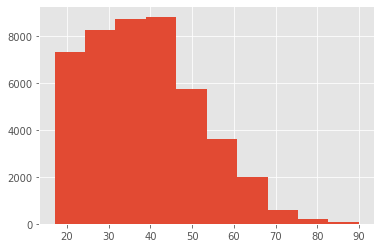

In [190]:
#plt.hist(df.education)
plt.hist(df.age)

In [194]:
pd.get_dummies(df,columns=['marital-status'])

,age,workclass,education,educational-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,Private,11th,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,1,0,0
1,38,Private,HS-grad,9,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,1,0,0,0,0
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0
3,44,Private,Some-college,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,1,0,0,0,0
5,34,Private,10th,6,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1,0,0,0,0
48838,40,Private,HS-grad,9,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0
48839,58,Private,HS-grad,9,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,0,0,0,0,1
48840,22,Private,HS-grad,9,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0,0,1,0,0


In [195]:
pd.get_dummies(df,columns=['race'])

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K,0,0,1,0,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K,0,0,0,0,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K,0,0,0,0,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K,0,0,1,0,0
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,<=50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K,0,0,0,0,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,0,0,0,0,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,0,0,0,0,1
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,0,0,0,0,1
